In [1]:
import pandas as pd

sales_weather_stock = pd.read_csv('sales_weather_stock.csv')

<>:5: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\e'
C:\Users\MDI F22\AppData\Local\Temp\ipykernel_34840\2272865632.py:5: SyntaxWarning: invalid escape sequence '\e'
  ecuador = gpd.read_file('ecu_adm_inec_20190724_shp\ecu_admbnda_adm2_inec_20190724.shp')


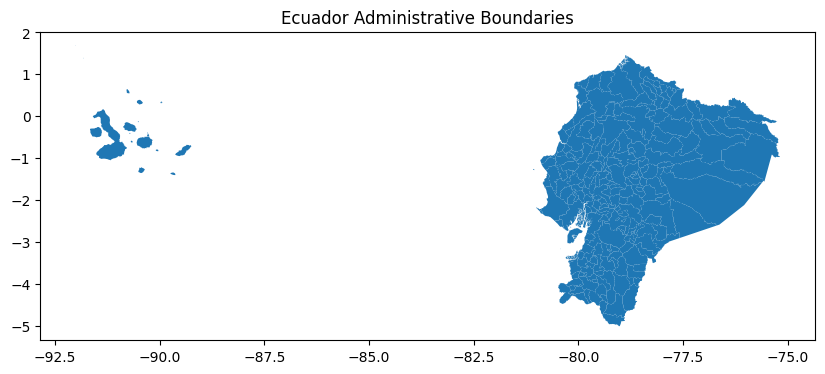

   Shape_Leng  Shape_Area                   ADM2_ES ADM2_PCODE ADM2_REF  \
0    1.388732    0.042720                24 de Mayo     EC1316     None   
1    7.096122    0.906912                  Aguarico     EC2202     None   
2    2.777711    0.134697                    Alausi     EC0602     None   
3    0.740157    0.017774  Alfredo Baquerizo Moreno     EC0902     None   
4    1.547719    0.082689                    Ambato     EC1801     None   

  ADM2ALT1ES ADM2ALT2ES     ADM1_ES ADM1_PCODE  ADM0_EN       ADM0_ES  \
0       None       None      Manabi       EC13  Ecuador  Ecuador (el)   
1       None       None    Orellana       EC22  Ecuador  Ecuador (el)   
2       None       None  Chimborazo       EC06  Ecuador  Ecuador (el)   
3       None       None      Guayas       EC09  Ecuador  Ecuador (el)   
4       None       None  Tungurahua       EC18  Ecuador  Ecuador (el)   

  ADM0_PCODE        date     validOn validTo  \
0         EC  2018-12-17  2019-07-24    None   
1         EC  

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile of Ecuador's administrative boundaries
ecuador = gpd.read_file('ecu_adm_inec_20190724_shp\ecu_admbnda_adm2_inec_20190724.shp')

# Plot the shapefile to check if it loaded correctly
fig, ax = plt.subplots(figsize=(10, 10))
ecuador.plot(ax=ax)
plt.title('Ecuador Administrative Boundaries')
plt.show()

# Check the head of the GeoDataFrame to see the loaded data
print(ecuador.head())

In [3]:
import statsmodels.api as sm

# Assuming 'les_weather_stock' is your dataframe with store, city, state, and weather information
# Select the relevant features and target variable
features = ['temp', 'precip', 'windspeed', 'cloudcover', 'visibility']
target = 'sales'

# Split the data into features (X) and target (y)
X = sales_weather_stock[features]
y = sales_weather_stock[target]

# Add a constant term to the features (required for OLS)
X = sm.add_constant(X)

# Create an OLS model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

# Get the residuals from the OLS model
residuals = results.resid

In [4]:
# Create a DataFrame with store_nbr, city, state, and residuals
df = pd.DataFrame({'store_nbr': sales_weather_stock['store_nbr'], 'city': sales_weather_stock['city'],
                   'state': sales_weather_stock['state'], 'residuals': residuals})

# Aggregate the residuals at the store level by taking the mean
store_residuals = df.groupby(['store_nbr', 'city', 'state'])['residuals'].mean().reset_index()

# # Merge the store residuals DataFrame with the Ecuador GeoDataFrame based on city and state
# ecuador_residuals = ecuador.merge(store_residuals, on=['city', 'state'])

In [5]:
print("Columns in 'ecuador' GeoDataFrame:", ecuador.columns)
print("Columns in 'store_residuals' DataFrame:", store_residuals.columns)

Columns in 'ecuador' GeoDataFrame: Index(['Shape_Leng', 'Shape_Area', 'ADM2_ES', 'ADM2_PCODE', 'ADM2_REF',
       'ADM2ALT1ES', 'ADM2ALT2ES', 'ADM1_ES', 'ADM1_PCODE', 'ADM0_EN',
       'ADM0_ES', 'ADM0_PCODE', 'date', 'validOn', 'validTo', 'geometry'],
      dtype='object')
Columns in 'store_residuals' DataFrame: Index(['store_nbr', 'city', 'state', 'residuals'], dtype='object')


In [6]:
# Rename the columns in the 'ecuador' GeoDataFrame to match the column names in 'store_residuals'
ecuador = ecuador.rename(columns={'ADM2_ES': 'city', 'ADM1_ES': 'state'})

In [7]:
# Merge the store residuals DataFrame with the Ecuador GeoDataFrame based on city and state
ecuador_residuals = ecuador.merge(store_residuals, on=['city', 'state'])

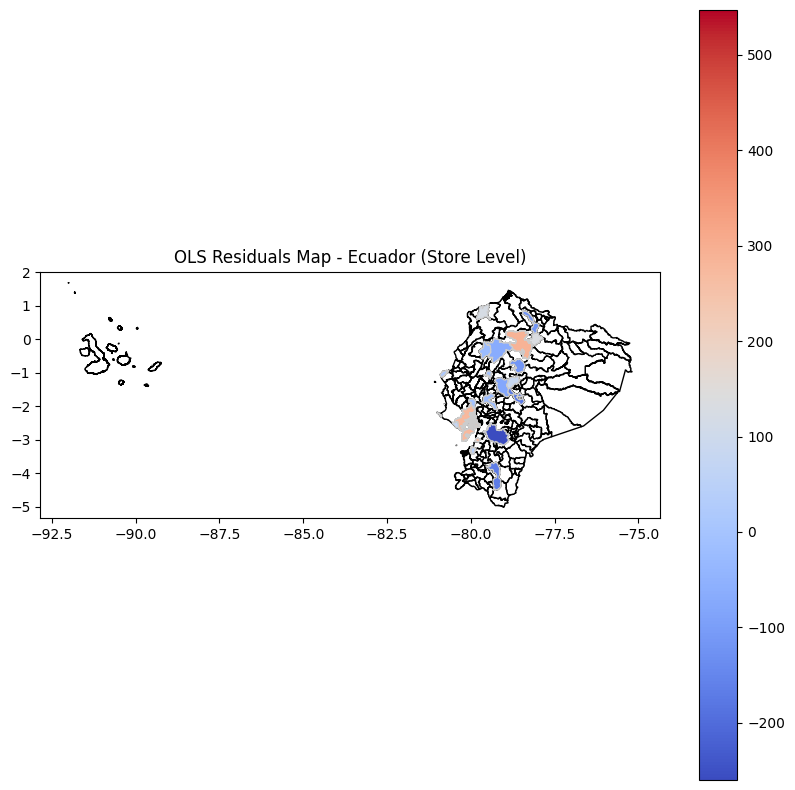

In [8]:
# Create a base map of Ecuador
ax = ecuador.plot(figsize=(10, 10), color='white', edgecolor='black')

# Plot the residuals on the map
ecuador_residuals.plot(column='residuals', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title and show the map
plt.title('OLS Residuals Map - Ecuador (Store Level)')
plt.show()

In this modification:

We create a new GeoDataFrame called ecuador_mainland that excludes the Galápagos Islands by filtering out the geometries of type 'MultiPolygon' (which represent the islands).
We create the base map using ecuador_mainland instead of ecuador.
We create a new GeoDataFrame called ecuador_residuals_mainland that excludes the Galápagos Islands from the ecuador_residuals GeoDataFrame.
We plot the residuals on the map using ecuador_residuals_mainland instead of ecuador_residuals.

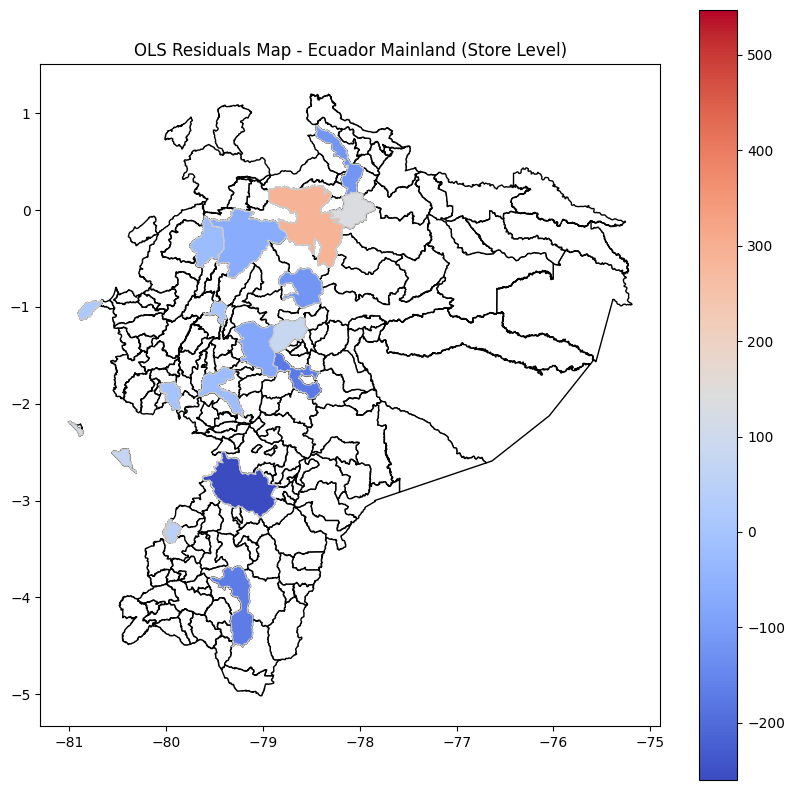

In [9]:
# Create a base map of Ecuador (mainland only)
ecuador_mainland = ecuador[ecuador.geometry.type != 'MultiPolygon']
ax = ecuador_mainland.plot(figsize=(10, 10), color='white', edgecolor='black')

# Plot the residuals on the map (excluding Galápagos Islands)
ecuador_residuals_mainland = ecuador_residuals[ecuador_residuals.geometry.type != 'MultiPolygon']
ecuador_residuals_mainland.plot(column='residuals', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title and show the map
plt.title('OLS Residuals Map - Ecuador Mainland (Store Level)')
plt.show()

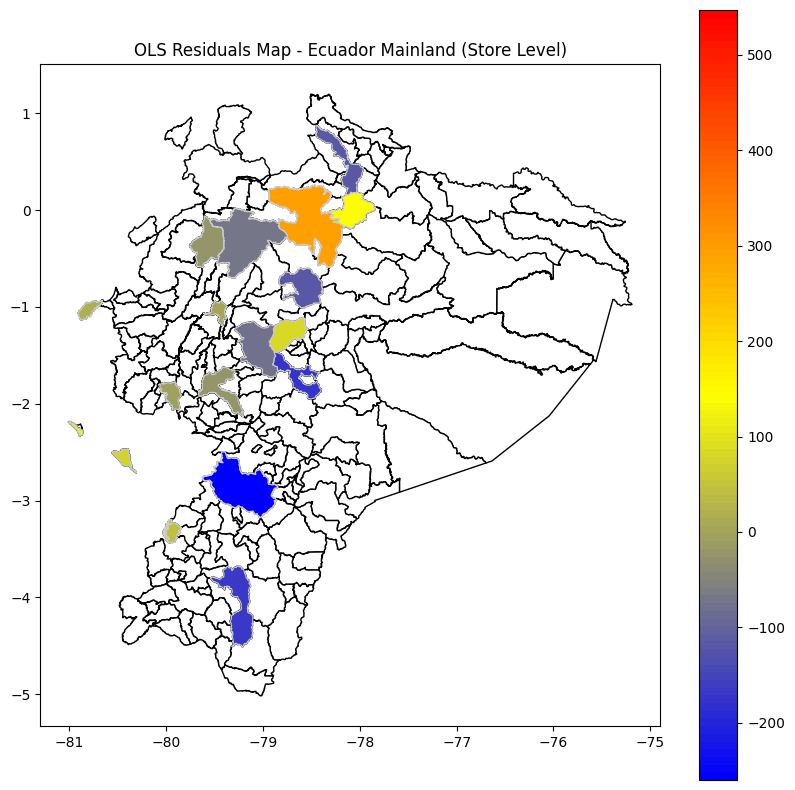

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Create a custom diverging color map
colors = ['blue', 'yellow', 'red']
cmap = LinearSegmentedColormap.from_list('custom', colors, N=100)

# Create a base map of Ecuador (mainland only)
ecuador_mainland = ecuador[ecuador.geometry.type != 'MultiPolygon']
ax = ecuador_mainland.plot(figsize=(10, 10), color='white', edgecolor='black')

# Plot the residuals on the map (excluding Galápagos Islands)
ecuador_residuals_mainland = ecuador_residuals[ecuador_residuals.geometry.type != 'MultiPolygon']
ecuador_residuals_mainland.plot(column='residuals', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title and show the map
plt.title('OLS Residuals Map - Ecuador Mainland (Store Level)')
plt.show()

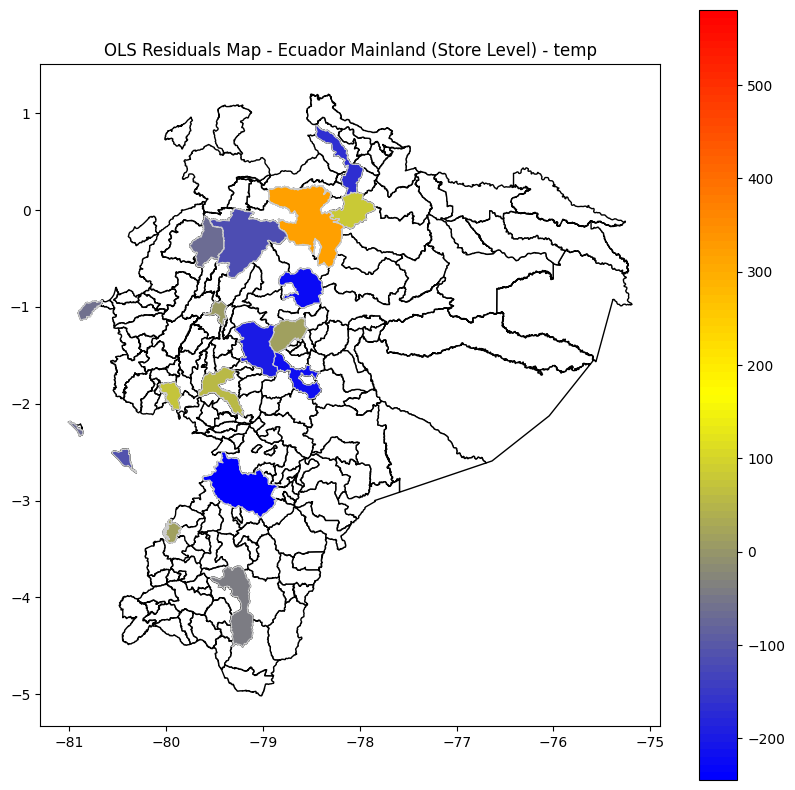

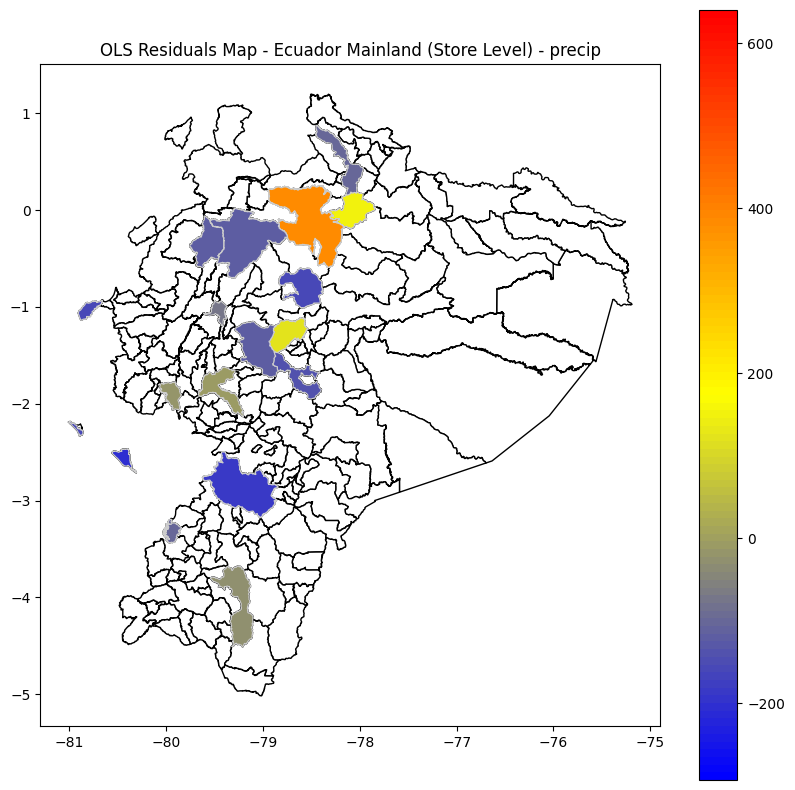

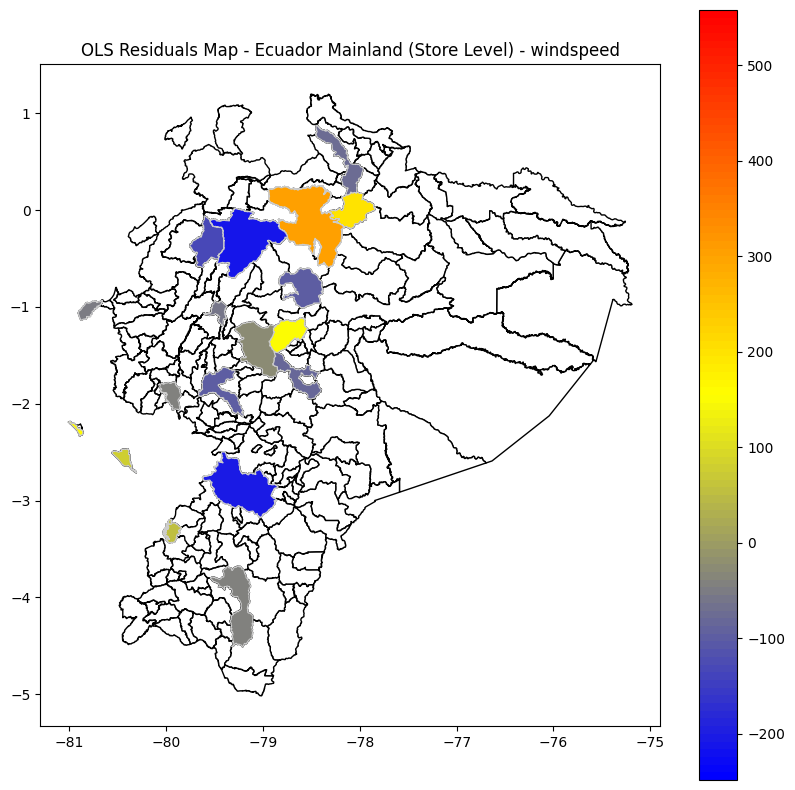

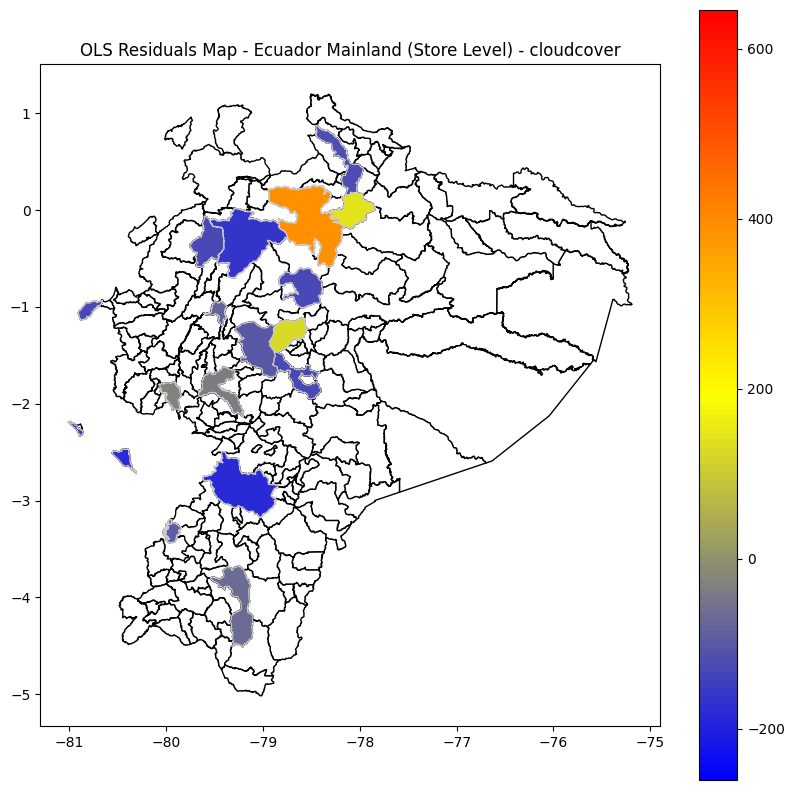

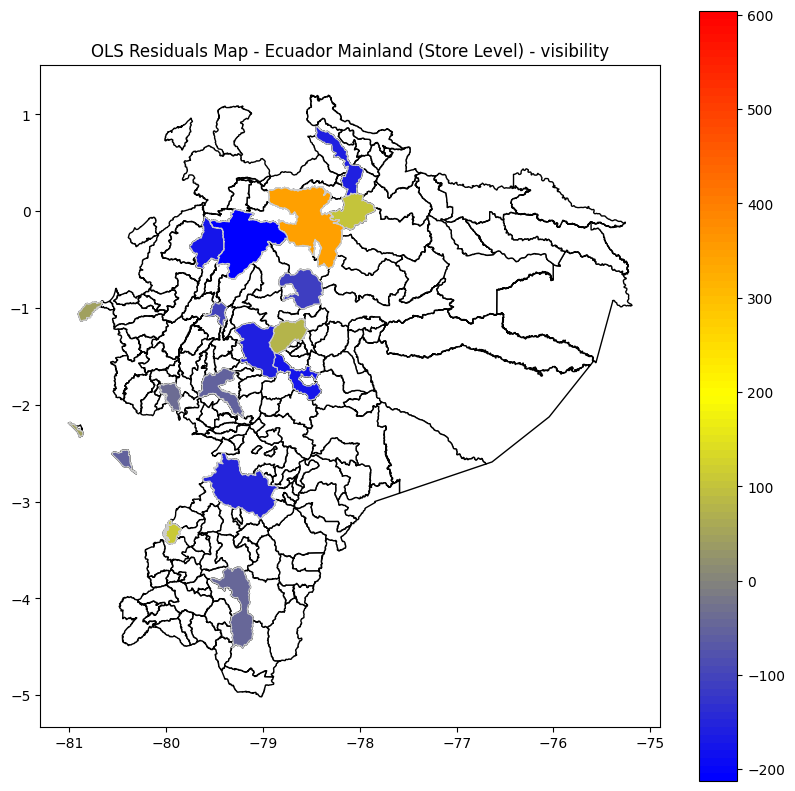

In [11]:
weather_vars = ['temp', 'precip', 'windspeed', 'cloudcover', 'visibility']
target = 'sales'

# Create a custom diverging color map
colors = ['blue', 'yellow', 'red']
cmap = LinearSegmentedColormap.from_list('custom', colors, N=100)

# Create a base map of Ecuador (mainland only)
ecuador_mainland = ecuador[ecuador.geometry.type != 'MultiPolygon']

# Iterate over each weather variable
for var in weather_vars:
    # Create a DataFrame with store_nbr, city, state, and the specific weather variable
    df = pd.DataFrame({'store_nbr': sales_weather_stock['store_nbr'], 'city': sales_weather_stock['city'],
                       'state': sales_weather_stock['state'], var: sales_weather_stock[var], target: sales_weather_stock[target]})
    
    # Aggregate the data at the store level by taking the mean
    store_data = df.groupby(['store_nbr', 'city', 'state'])[[var, target]].mean().reset_index()
    
    # Create the OLS model for the specific weather variable
    X = sm.add_constant(store_data[var])
    y = store_data[target]
    model = sm.OLS(y, X)
    results = model.fit()
    
    # Get the residuals from the OLS model
    residuals = results.resid
    
    # Add the residuals to the store_data DataFrame
    store_data['residuals'] = residuals
    
    # Merge the store_data DataFrame with the Ecuador GeoDataFrame based on city and state
    ecuador_residuals = ecuador.merge(store_data, on=['city', 'state'])
    
    # Create a subplot for the specific weather variable
    fig, ax = plt.subplots(figsize=(10, 10))
    ecuador_mainland.plot(ax=ax, color='white', edgecolor='black')
    
    # Plot the residuals on the map (excluding Galápagos Islands)
    ecuador_residuals_mainland = ecuador_residuals[ecuador_residuals.geometry.type != 'MultiPolygon']
    ecuador_residuals_mainland.plot(column='residuals', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
    
    # Add a title and show the map
    plt.title(f'OLS Residuals Map - Ecuador Mainland (Store Level) - {var}')
    plt.show()

In this updated code:

We create an empty dictionary called impact_dfs to store the DataFrames for each weather variable.
We iterate over each weather variable and perform the same steps as before to calculate the residuals.
After adding the residuals to the store_family_data DataFrame, we calculate the mean residuals at the city, state, and family level using groupby and mean(). This gives us the impact of the specific weather variable on product families at the city and state level.
We create a new DataFrame called impact_df that contains the columns 'city', 'state', 'family', and 'residuals'.
We add a new column called 'weather_var' to the impact_df DataFrame, indicating the specific weather variable.
We store each impact_df DataFrame in the impact_dfs dictionary, using the weather variable as the key.
After iterating over all the weather variables, we concatenate all the impact_df DataFrames into a single DataFrame called final_impact_df using pd.concat().
Finally, we print the final_impact_df DataFrame, which shows the impact of each weather variable on product families at the city and state level.
The resulting final_impact_df DataFrame will have columns 'city', 'state', 'family', 'residuals', and 'weather_var'. Each row represents the impact of a specific weather variable on a product family in a particular city and state, as indicated by the residuals.

You can analyze this DataFrame to identify which product families are positively or negatively impacted by each weather variable in different cities and states. This information can help the company focus on specific products and regions based on the weather conditions.

In [12]:
import pandas as pd
import statsmodels.api as sm

# Select the relevant features and target variable
weather_vars = ['temp', 'precip', 'windspeed', 'cloudcover', 'visibility']
target = 'sales'

# Create an empty dictionary to store the DataFrames for each weather variable
impact_dfs = {}

# Iterate over each weather variable
for var in weather_vars:
    # Create a DataFrame with store_nbr, city, state, family, and the specific weather variable
    df = sales_weather_stock[['store_nbr', 'city', 'state', 'family', var, target]]
    
    # Aggregate the data at the store and family level by taking the mean
    store_family_data = df.groupby(['store_nbr', 'city', 'state', 'family'])[[var, target]].mean().reset_index()
    
    # Create the OLS model for the specific weather variable
    X = sm.add_constant(store_family_data[var])
    y = store_family_data[target]
    model = sm.OLS(y, X)
    results = model.fit()
    
    # Get the residuals from the OLS model
    residuals = results.resid
    
    # Add the residuals to the store_family_data DataFrame
    store_family_data['residuals'] = residuals
    
    # Calculate the mean residuals at the city, state, and family level
    impact_df = store_family_data.groupby(['city', 'state', 'family'])['residuals'].mean().reset_index()
    
    # Add the weather variable as a column to the impact_df DataFrame
    impact_df['weather_var'] = var
    
    # Store the impact_df DataFrame in the dictionary with the weather variable as the key
    impact_dfs[var] = impact_df

# Concatenate all the impact_df DataFrames into a single DataFrame
final_impact_df = pd.concat(impact_dfs.values(), ignore_index=True)

# Print the final_impact_df DataFrame
print("Impact of weather variables on product families at the city and state level:")
print(final_impact_df)

Impact of weather variables on product families at the city and state level:
               city                           state  \
0            Ambato                      Tungurahua   
1            Ambato                      Tungurahua   
2            Ambato                      Tungurahua   
3            Ambato                      Tungurahua   
4            Ambato                      Tungurahua   
...             ...                             ...   
3625  Santo Domingo  Santo Domingo de los Tsachilas   
3626  Santo Domingo  Santo Domingo de los Tsachilas   
3627  Santo Domingo  Santo Domingo de los Tsachilas   
3628  Santo Domingo  Santo Domingo de los Tsachilas   
3629  Santo Domingo  Santo Domingo de los Tsachilas   

                          family    residuals weather_var  
0                     AUTOMOTIVE  -424.279664        temp  
1                      BABY CARE  -429.997420        temp  
2                         BEAUTY  -426.225777        temp  
3                     

In [13]:
# Exporting the DataFrame to CSV
finalimpact_csv_file_path = 'final_impact_df.csv' 
final_impact_df.to_csv(finalimpact_csv_file_path, index=False)

| City | State | Product Family | Weather Variable | Insight |
|------|-------|----------------|------------------|---------|
| Guayaquil | Guayas | PRODUCE | Precipitation | Precipitation positively impacts produce sales |
| Guayaquil | Guayas | PRODUCE | Visibility | Visibility positively affects produce sales |
| Manta | Manabi | PRODUCE | Wind Speed | Wind speed increases produce sales |
| Daule | Guayas | BEVERAGES | Cloud Cover | Cloud cover positively impacts beverage sales |
| Libertad | Guayas | GROCERY I | Cloud Cover | Cloud cover increases grocery sales |
| Quito | Pichincha | GROCERY I | Wind Speed | Wind speed positively affects grocery sales |
| Machala | El Oro | GROCERY I | Visibility | Visibility increases grocery sales |

These findings might not be immediately apparent or intuitive but could provide valuable insights for businesses:

1. In Guayaquil, both precipitation and visibility positively impact produce sales, which may not be expected but could be related to the region's agricultural activities and the influence of weather conditions on crop growth and transportation.

2. In Manta, wind speed increases produce sales, which might be counterintuitive. However, this could be related to the city's fishing industry, where wind patterns influence fishing activities and, consequently, the availability of seafood produce.

3. In Daule, cloud cover positively impacts beverage sales, which may not be an obvious connection. This could be due to the region's tropical climate and the increased demand for refreshing drinks during cloudy weather.

4. In Libertad, cloud cover increases grocery sales, which might not be directly apparent. This could be related to changes in consumer behavior during cloudy weather, such as increased indoor activities leading to higher grocery purchases.

5. In Quito, wind speed positively affects grocery sales, which may not be a commonly considered factor. This could be related to the impact of wind on product distribution, store footfall, or other factors specific to the region.

6. In Machala, visibility increases grocery sales, which might not be an immediate connection. However, clear weather conditions could facilitate the transportation and distribution of grocery products in this major agricultural region.

These insights demonstrate that weather variables can have unexpected or non-obvious impacts on product sales in different regions. By considering these findings, businesses can adapt their strategies to capitalize on the unique weather-related patterns in each location.